# Lekcja 4. Matematyka w `numpy`

Pakiet numpy udostępnia wiele funkcji matematycznych. Wśród nich są `abs`, `sign`, `sqrt`, `log`, `log10`, `exp`, funkcje trygonometryczne (`sin`, `cos` i `tan`), funkcje cyklometryczne (`arcsin`, `arccos` i `arctan`) hiperboliczne i polowe (`sinh`, `cosh`, `tanh`, `arcsinh`, `arccosh` i `arctanh`) i wiele innych. Numpy zawiera również numeryczne przybliżenia dwóch stałych matematycznych: $\pi$ i $e$.

In [ ]:
import numpy as np

print(np.pi, np.e)

3.141592653589793 2.718281828459045


W przypadku obliczeń (np. standardowych operacji arytmetycznych) z wykorzystaniem tablic (`array`), operacje wykonywane są na poszczególnych elementach, a rezultatem jest tablica wyników. Prześledźmy to na przykładach. Utworzymy tablicę $A$ o wymiarze $2\times 2$ a następnie obliczymy $\sqrt{A}$, $2\cdot A$, $A+20$ oraz $\frac{100}{A}$

In [ ]:
import numpy as np

A=np.array([[1.,2.],[0.5,0.25]])
print(A,'\n')

print(np.sqrt(A),'\n')

print(2*A,'\n')

print(A + 20.,'\n')

print(100/A)


[[1.   2.  ]
 [0.5  0.25]] 

[[1.         1.41421356]
 [0.70710678 0.5       ]] 

[[2.  4. ]
 [1.  0.5]] 

[[21.   22.  ]
 [20.5  20.25]] 

[[100.  50.]
 [200. 400.]]


Tak naprawdę, to tę cechę obliczeń na tablicach wykorzystywaliśmy już wcześniej, przy tworzeniu wykresów. Zwróćmy na to uwagę:

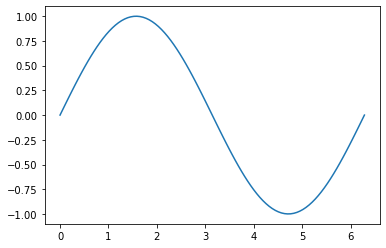

<class 'numpy.ndarray'> 1
<class 'numpy.ndarray'> 1


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

x=np.linspace(0,2*np.pi,100)
y=np.sin(x)
plt.plot(x, y)
plt.show()

print(type(x), x.ndim)
print(type(y), y.ndim)


W powyższym przykładzie stworzyliśmy jednowymiarową tablicę (wektor) $x$ a następnie obliczyliśmy $y = \sin(x)$. Widzimy, że $y$ jest również wektorem.

Jeśli działania arytmetyczne (np. dodawanie i odejmowanie) wykonujemy na tablicach, to również te operacje są wykonywane element po elemencie. Również mnożenie i dzielenie jest przeprowadzane pomiędzy poszczególnymi odpowiednimi elementami.

In [ ]:
import numpy as np

A=np.array([[1,2], [3,4]])
B=np.array([[.5,.25], [10,50]])

print(A+B)
print()
print(A-2*B)
print()
print(A*B)

[[ 1.5   2.25]
 [13.   54.  ]]

[[  0.    1.5]
 [-17.  -96. ]]

[[  0.5   0.5]
 [ 30.  200. ]]


Powyższe operacje wymagają zgodności rozmiarów (kształtów) tablic, w przypadku różnych rozmiarów wystąpi błąd:

In [2]:
import numpy as np

A=np.array([[1,2], [3,4]])
C=np.array([[1,2,3],[4,5,6]])

print(A+C)

ValueError: ignored

W przypadku, jeśli rozmiar (długość) danych jest zgodna, ale występuje niezgodność wymiaru tablic (np. wektor o długości $2$ i tablica kwadratowa $2\times 2$), python automatycznie rozszerzy (`broadcast`) tablicę o niższym wymiarze: 

In [ ]:
import numpy as np

A=np.array([[1,2], [3,4]])
B=np.array([.25,.5])

print(A,'\n')
print(B,'\n')
print(A+B,'\n')
print(A*B)

[[1 2]
 [3 4]] 

[0.25 0.5 ] 

[[1.25 2.5 ]
 [3.25 4.5 ]] 

[[0.25 1.  ]
 [0.75 2.  ]]


Jak widzimy, dodając $A+B$ python najpierw rozszerzył wektor $B$ o drugi wiersz (identyczny z pierwszym) a następnie dodał odpowiednie elementy. Podobnie stało się w przypadku mnożenia $AB$.

## Rachunek macierzowy i wektorowy

### Iloczyn skalarny

W przypadku skalarów (liczb) iloczyn skalarny jest po prostu iloczynem tych liczb. Iloczyn skalarny wektorów jest zdefiniowany następująco:

Jeśli mamy dwa wektory $\vec a= [a_1, a_2, \ldots a_n]$ i $\vec b= [b_1, b_2, \ldots b_n]$, to ich iloczyn skalarny będzie wynosił: $$\vec a\cdot \vec b =a_1\cdot b_1+a_2\cdot b_2+\ldots+a_n\cdot b_n=\sum_{i=1}^{n}a_i\cdot b_i$$

Przypomnijmy również definicję iloczynu macierzy:

Mamy dwie macierze

$A=[[a_{11},a_{12},\ldots a_{1p}],[a_{21},a_{22},\ldots a_{2p}],\ldots[a_{n1},a_{n2},\ldots a_{np}]]$, oraz $B=[[b_{11},b_{12},\ldots b_{1m}],[b_{21},b_{22},\ldots b_{2m}],\ldots [b_{p1},b_{p2},\ldots b_{pm}]]$ 

o wymiarach odpowiednio $n\times p$ i $p\times m$. Ich iloczynem będzie macierz $C=AB$ o wymiarze $n\times m$ taka, że:
$$c_{ij}=a_{i1}\cdot b_{1j}+a_{i2}\cdot b_{2j}+\ldots a_{ip}\cdot b_{pj}=\sum_{k=1}^{p}a_{ik}\cdot b_{kj}$$

Jak łatwo można zauważyć - z powyższych definicji wynika, że iloczyn skalarny wektorów można przedstawić za pomocą mnożenia macierzy, jeśli potraktujemy wektory jako macierze o wymiarze $1\times n$. Wtedy:
$$\vec a \cdot \vec b = ab^T$$

Po tym krótkim interludium matematycznym możemy wrócić do `numpy`. Iloczyn skalarny jest zapisywany symbolem kropki, dlatego odpowiednia funkcja nazywa się `dot()`. Przetestujmy jej działanie:

In [2]:
import numpy as np

k=2
l=3
print('k={}, l={}, k⋅l={}\n'.format(k, l, np.dot(k,l)))

X=np.array([1,2,3])
Y=np.array([2,-3,-1])
print('x={}, y={}, x⋅y={}\n'.format(X, Y, np.dot(X,Y)))

A=np.array([[.5,.25], [10,50],[-2,-10]])
B=np.array([[1,2,4], [3,4,5]])

print('A={},\nB={},\nAB={}'.format(A, B, np.dot(A,B)))

k=2, l=3, k⋅l=6

x=[1 2 3], y=[ 2 -3 -1], x⋅y=-7

A=[[  0.5    0.25]
 [ 10.    50.  ]
 [ -2.   -10.  ]],
B=[[1 2 4]
 [3 4 5]],
AB=[[  1.25   2.     3.25]
 [160.   220.   290.  ]
 [-32.   -44.   -58.  ]]


Pakiet `numpy` dostarcza również pozostałych operacji na macierzach. Dokonajmy transpozycji macierzy:

In [ ]:
import numpy as np

X=np.array([[1,2,4], [3,4,5]])

print(X)
print(np.transpose(X))

[[1 2 4]
 [3 4 5]]
[[1 3]
 [2 4]
 [4 5]]


W ramach pakietu `numpy` dostępna jest biblioteka algebry liniowej `linalg`, w której są zawarte kolejne przydatne funkcje. Możemy obliczyć wyznacznik macierzy kwadratowej:

In [ ]:
import numpy as np

b = np.array([[6,1,1], [4, -2, 5], [2,8,7]]) 
print(b) 
print(np.linalg.det(b)) 

[[ 6  1  1]
 [ 4 -2  5]
 [ 2  8  7]]
-306.0


Dostępne są także bardziej skomplikowane funkcje, na przykład obliczanie macierzy odwrotnej...

In [1]:
import numpy as np 

x = np.array([[1,2],[3,4]]) 
y = np.linalg.inv(x) 
print(x)
print(y) 
print(np.dot(x,y))

[[1 2]
 [3 4]]
[[-2.   1. ]
 [ 1.5 -0.5]]
[[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]


... jak również znajdowanie wektorów i wartości własnych macierzy:

In [ ]:
import numpy as np 

A = np.array([[1,2,3],[3,2,1],[1,0,-1]])
w, v = np.linalg.eig(A)
print(w)
print(v)

[ 4.31662479e+00 -2.31662479e+00  1.47314580e-16]
[[ 0.58428153  0.73595785  0.40824829]
 [ 0.80407569 -0.38198836 -0.81649658]
 [ 0.10989708 -0.55897311  0.40824829]]


### Iloczyn wektorowy wektorów, iloczyny wewnętrzny i zewnętrzny

Pakiet `numpy` zawiera również funkcję liczącą iloczyn wektorowy wektorów. Przypomnijmy, że iloczynem $\vec a \times \vec b$ jest wektor $\vec c$ prostopadły do płaszczyzny mnożonych wektorów, o długości równej polu powierzchni równoległoboku wyznaczonego przez dane wektory. Układ wektorów $\vec a$, $\vec b$ i $\vec c$ jest zgodny z bazą (układem współrzędnych) przestrzeni.

In [ ]:
import numpy as np

a, b = np.array([2, 0, 0]), np.array([0, 2, 0])
print(np.cross(a, b))

# wektory równoległe (iloczynem jest wektor zerowy):

c,d= np.array([2, 2, 0]), np.array([-1, -1, 0])
print(np.cross(c, d))

[0 0 4]
[0 0 0]


 Pakiet numpy zawiera także bardziej zaawansowane operacje, takie jak iloczyn wewnętrzny `np.inner()` czy iloczyn zewnętrzny `np.outer()`, jednak ich szczegółowe omówienie wykracza daleko poza ramy naszego wprowadzenia. Zainteresowanych czytelników zapraszamy do zapoznania się z [dokumentacją](https://numpy.org/doc/stable/reference/routines.linalg.html).
 
 ### ,,Prawdziwe'' macierze w `numpy`

Do tej pory wszystkich operacji dokonywaliśmy na tablicach (`array`). Pakiet `numpy` dostarcza jednak osobnego typu danych dedykowanego właśnie macierzom. Macierz możemy uzyskać z tablicy lub listy list za pomocą funkcji `matrix()`. Podstawową różnicą pomiędzy macierzą a tablicą jest zachowanie operatora mnożenia. Jak wcześniej widzieliśmy, w przypadku tablic mnożone są elementy o odpowiadających indeksach. W przypadku macierzy zachowanie operatora mnożenia jest prawidłowe, to znaczy zostanie wykonane mnożenie macierzy (nie musimy używać funkcji `dot()`). Sprawdźmy, jak to działa:

In [ ]:

import numpy as np

A = np.array([ [1, 2, 3], [2, 2, 2], [3, 3, 3] ])
B = np.array([ [3, 2, 1], [1, 2, 3], [-1, -2, -3] ])

R = A * B
print(R)

Am=np.matrix(A)
Bm=np.matrix(B)
Rm=Am*Bm
print(Rm)


[[ 3  4  3]
 [ 2  4  6]
 [-3 -6 -9]]
[[ 2  0 -2]
 [ 6  4  2]
 [ 9  6  3]]


Argumentem funkcji `matrix()` może być również łańcuch znaków (`string`). Wtedy przecinki będą traktowane jako separatory kolumn a średnik - jako separator wierszy, jak w poniższym przykładzie:

In [ ]:
import numpy as np

a = np.matrix('1 2; 3 4')

print(a)
print(type(a))

[[1 2]
 [3 4]]
<class 'numpy.matrix'>


Oczywiście możliwości wspomnianych bibliotek są dużo większe i daleko wykraczają poza zakres tego kursu. Kolejny raz zachęcamy do samodzielnego eksplorowania dokumentacji i eksperymentowania.
